In [79]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
data = pd.read_csv('heart_disease_dataset.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [81]:
data.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [82]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [83]:
# Replace NaN values with the mean of the column
data['ca'].fillna(data['ca'].mean(), inplace=True)
data['thal'].fillna(data['thal'].mean(), inplace=True)

In [84]:
data.duplicated().sum()

0

In [85]:
x = data.drop('target', axis = 1)
y = data['target']

In [86]:
#split data into train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,29.0,1.0,2.0,130.0,204.0,0.0,2.0,202.0,0.0,0.0,1.0,0.0,3.0
202,57.0,1.0,3.0,150.0,126.0,1.0,0.0,173.0,0.0,0.2,1.0,1.0,7.0
196,69.0,1.0,1.0,160.0,234.0,1.0,2.0,131.0,0.0,0.1,2.0,1.0,3.0
75,65.0,0.0,3.0,160.0,360.0,0.0,2.0,151.0,0.0,0.8,1.0,0.0,3.0
176,52.0,1.0,4.0,108.0,233.0,1.0,0.0,147.0,0.0,0.1,1.0,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,54.0,1.0,2.0,192.0,283.0,0.0,2.0,195.0,0.0,0.0,1.0,1.0,7.0
71,67.0,1.0,4.0,125.0,254.0,1.0,0.0,163.0,0.0,0.2,2.0,2.0,7.0
106,59.0,1.0,4.0,140.0,177.0,0.0,0.0,162.0,1.0,0.0,1.0,1.0,7.0
270,61.0,1.0,4.0,140.0,207.0,0.0,2.0,138.0,1.0,1.9,1.0,1.0,7.0


In [87]:
#scale the feature using minmax scaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [88]:
x_train_scaled 

array([[0.        , 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 1.        , 0.66666667, ..., 0.        , 0.33333333,
        1.        ],
       [0.83333333, 1.        , 0.        , ..., 0.5       , 0.33333333,
        0.        ],
       ...,
       [0.625     , 1.        , 1.        , ..., 0.        , 0.33333333,
        1.        ],
       [0.66666667, 1.        , 1.        , ..., 0.        , 0.33333333,
        1.        ],
       [0.58333333, 0.        , 1.        , ..., 0.        , 0.33333333,
        0.        ]])

In [89]:
#Decision Tree
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(x_train_scaled, y_train)
dt_predictions = dt_model.predict(x_test_scaled)
dt_predictions

array([0, 0, 2, 2, 1, 1, 4, 1, 0, 3, 0, 0, 0, 3, 4, 0, 0, 2, 3, 0, 2, 0,
       3, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 3, 0, 2, 0, 1, 0,
       2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 1, 2, 2, 0], dtype=int64)

# Here we use Pickle library to save data into csv file

In [90]:

import pickle
# Save the model using pickle
with open('dt_model.pkl', 'wb') as model_file:
 pickle.dump(dt_model, model_file)


In [91]:
#we reset the index here
x_test.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

In [92]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0
1,54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0
2,56.0,1.0,4.0,125.0,249.0,1.0,2.0,144.0,1.0,1.2,2.0,1.0,3.0
3,58.0,1.0,4.0,100.0,234.0,0.0,0.0,156.0,0.0,0.1,1.0,1.0,7.0
4,51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,62.0,1.0,2.0,128.0,208.0,1.0,2.0,140.0,0.0,0.0,1.0,0.0,3.0
57,49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0
58,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
59,62.0,0.0,4.0,138.0,294.0,1.0,0.0,106.0,0.0,1.9,2.0,3.0,3.0


In [93]:
#add original target  column here in test dataset

x_test['target'] = data['target']
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0,0
1,54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0,2
2,56.0,1.0,4.0,125.0,249.0,1.0,2.0,144.0,1.0,1.2,2.0,1.0,3.0,1
3,58.0,1.0,4.0,100.0,234.0,0.0,0.0,156.0,0.0,0.1,1.0,1.0,7.0,0
4,51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,62.0,1.0,2.0,128.0,208.0,1.0,2.0,140.0,0.0,0.0,1.0,0.0,3.0,1
57,49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0,1
58,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,0
59,62.0,0.0,4.0,138.0,294.0,1.0,0.0,106.0,0.0,1.9,2.0,3.0,3.0,0


In [94]:
# Mapping
class_mapping = {
 0: "coronary heart disease",
 1: "aortic disease",
 2: "peripheral arterial disease",
 3: "stroke",
 4: "unknown"
}
# Map the predicted_target column to the class labels
x_test['Original_Disease_Classes'] = x_test['target'].map(class_mapping)
# Display 

In [95]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Original_Disease_Classes
0,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0,0,coronary heart disease
1,54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0,2,peripheral arterial disease
2,56.0,1.0,4.0,125.0,249.0,1.0,2.0,144.0,1.0,1.2,2.0,1.0,3.0,1,aortic disease
3,58.0,1.0,4.0,100.0,234.0,0.0,0.0,156.0,0.0,0.1,1.0,1.0,7.0,0,coronary heart disease
4,51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0,0,coronary heart disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,62.0,1.0,2.0,128.0,208.0,1.0,2.0,140.0,0.0,0.0,1.0,0.0,3.0,1,aortic disease
57,49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0,1,aortic disease
58,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,0,coronary heart disease
59,62.0,0.0,4.0,138.0,294.0,1.0,0.0,106.0,0.0,1.9,2.0,3.0,3.0,0,coronary heart disease


In [96]:
#now we add prediction of decision tree in test dataset
x_test['dt_predicted'] = dt_predictions
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Original_Disease_Classes,dt_predicted
0,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0,0,coronary heart disease,0
1,54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0,2,peripheral arterial disease,0
2,56.0,1.0,4.0,125.0,249.0,1.0,2.0,144.0,1.0,1.2,2.0,1.0,3.0,1,aortic disease,2
3,58.0,1.0,4.0,100.0,234.0,0.0,0.0,156.0,0.0,0.1,1.0,1.0,7.0,0,coronary heart disease,2
4,51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0,0,coronary heart disease,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,62.0,1.0,2.0,128.0,208.0,1.0,2.0,140.0,0.0,0.0,1.0,0.0,3.0,1,aortic disease,0
57,49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0,1,aortic disease,1
58,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,0,coronary heart disease,2
59,62.0,0.0,4.0,138.0,294.0,1.0,0.0,106.0,0.0,1.9,2.0,3.0,3.0,0,coronary heart disease,2


In [97]:
print("\n Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))


 Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        29
           1       0.30      0.25      0.27        12
           2       0.31      0.44      0.36         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.27      0.30      0.28        61
weighted avg       0.47      0.49      0.48        61



In [98]:
print('decision tree confusion matrix:')
print(confusion_matrix(y_test, dt_predictions))

decision tree confusion matrix:
[[23  1  4  1  0]
 [ 4  3  4  1  0]
 [ 1  1  4  2  1]
 [ 1  4  1  0  1]
 [ 1  1  0  2  0]]


In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
# Confusion Matrices
def plot_confusion_matrix(cm, classes, model_name):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

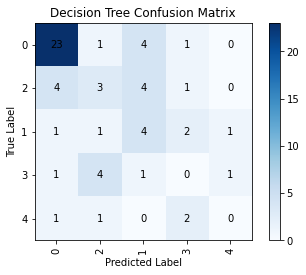

In [100]:
dt_cm = confusion_matrix(y_test, dt_predictions)
plot_confusion_matrix(dt_cm, data['target'].unique(), 'Decision Tree')

# Random Forest

In [101]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(x_train_scaled, y_train)
rf_predictions = rf_model.predict(x_test_scaled)
rf_predictions

array([0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 3, 2, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 1, 0, 0], dtype=int64)

In [102]:
#save rf model
with open('rf_model.pkl','wb') as model_file:
    pickle.dump(rf_model, model_file)

In [103]:
print("\n random forest report:")
print(classification_report(y_test, rf_predictions))


 random forest report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.10      0.08      0.09        12
           2       0.14      0.11      0.12         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.19      0.23      0.21        61
weighted avg       0.38      0.49      0.43        61



In [104]:
print("confusion matrix:")
print(confusion_matrix(y_test, rf_predictions))

confusion matrix:
[[28  0  1  0  0]
 [ 6  1  3  2  0]
 [ 4  2  1  2  0]
 [ 1  5  1  0  0]
 [ 0  2  1  1  0]]


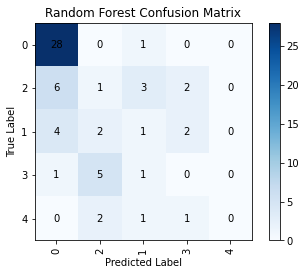

In [105]:
dt_cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(dt_cm, data["target"].unique(), 'Random Forest')

# SVM

In [107]:
svm_model = SVC(random_state=42)
svm_model.fit(x_train_scaled, y_train)
svm_predictions = svm_model.predict(x_test_scaled)
svm_predictions

array([0, 3, 3, 0, 1, 3, 1, 3, 0, 0, 0, 0, 0, 1, 3, 0, 0, 3, 2, 0, 0, 0,
       3, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 1, 0, 0], dtype=int64)